# Forces and Torques Between Spheres



In [1]:
import numpy as np
import pymagnet as pm
%matplotlib inline
# %matplotlib notebook

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from numba import njit, guvectorize
PI = np.pi
MU0 = 4e-7*PI

In [2]:
def plot_force_result(offsets,f_total, spacing=None, compare=None, plot_type='force'):
    fig,ax = plt.subplots(figsize=(8,8))
    
    if plot_type.lower() == 'torque':
        labels = [ r"$\tau_x$", r"$\tau_y$", r"$\tau_z$"]
    else:
        labels = [ r"$F_x$", r"$F_y$", r"$F_z$"]
    
    plt.plot(offsets,f_total[:,0], label=labels[0])
    plt.plot(offsets,f_total[:,1], label=labels[1])
    plt.plot(offsets,f_total[:,2], label=labels[2])
    
    if spacing is not None and compare is not None:
        plt.scatter(spacing,compare[0])
        plt.scatter(spacing,compare[1])
        plt.scatter(spacing,compare[2])

    plt.legend(loc='best')
    if plot_type.lower() == 'torque':
        plt.ylabel(r'$\tau$ (mN.m)')
    else:
        plt.ylabel(r'$F$ (N)')
    plt.xlabel(r"$d$ (mm)")
    plt.grid(True)
    plt.show()

In [3]:
def gen_sphere_magnets(offset = 0, **kwargs):
    pm.reset_magnets()

    radius = 10

    mask_magnet = kwargs.pop('mask_magnet', 'nan')
    alpha = kwargs.pop('alpha', 0)
    beta = kwargs.pop('beta', 0)
    gamma = kwargs.pop('gamma', 0)

    # magnetised in y: 
    theta, phi = 0.0, 0.0
 
    
    m1 = None
    center = (0,0, -radius - offset/2)
    m1 = pm.magnets.Sphere(radius = radius, Jr = 1.0, center=center,
                              alpha = 0,
                              beta = 0,
                              gamma = 0,
                              mask_magnet=False)
    
    center = (1,-3, radius + offset/2)
    m2 = pm.magnets.Sphere(radius = radius, Jr = 1.0, center=center,
                              alpha = alpha,
                              beta = beta,
                              gamma = gamma,
                              mask_magnet=False)
    
   
    return m1, m2


3D Render:
![Sphere Slice](img/sphere_slice.png)

In [ ]:
mask_magnet = True
m1, m2 = gen_sphere_magnets(offset = 5, alpha=20, beta=60, gamma=30)

fig_slice, slice_cache, data_objects = pm.plots.slice_quickplot(cmax=0.5,
                                              num_levels=11,
                                              opacity=1.0,
                                              num_arrows=10,
                                              num_points=200,
                                              cone_opacity=0.9,
                                              magnet_opacity=1.0,
                                              mask_magnet = mask_magnet,
                                              show_magnets=True,
                                              colorscale='viridis',
                                              max1 = 40,
                                              max2 = 40,
                                              slice_value= 0.0,
                                              unit = 'mm'
                               )

In [37]:
force_points = 20
offsets = np.linspace(1,10,force_points)

f_total = np.zeros((force_points,3))
t_total = np.zeros((force_points,3))
unit = 'mm'

for i in range(force_points):
    m1, m2 = gen_sphere_magnets(offset = offsets[i], alpha=20, beta=60, gamma=30)
    active_magnet = m2
    f_total[i], t_total[i] = m2.get_force_torque(num_samples = 300, unit=unit)




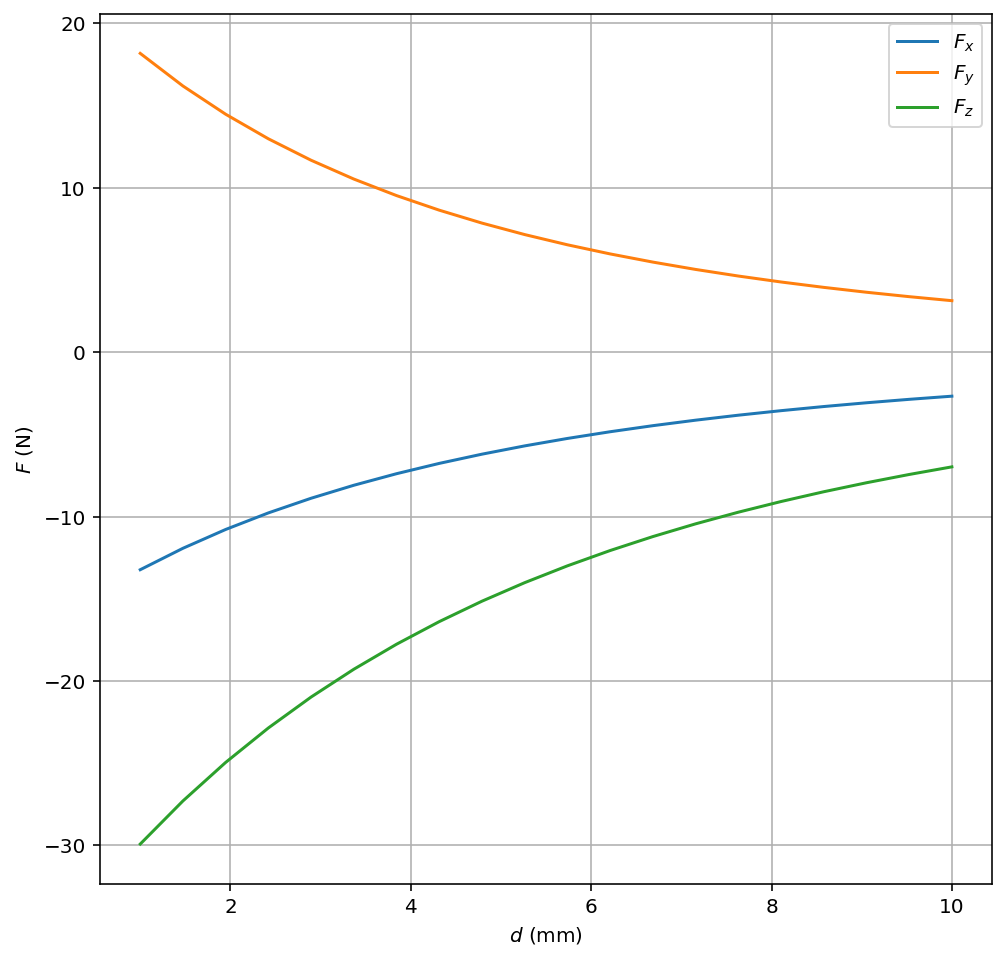

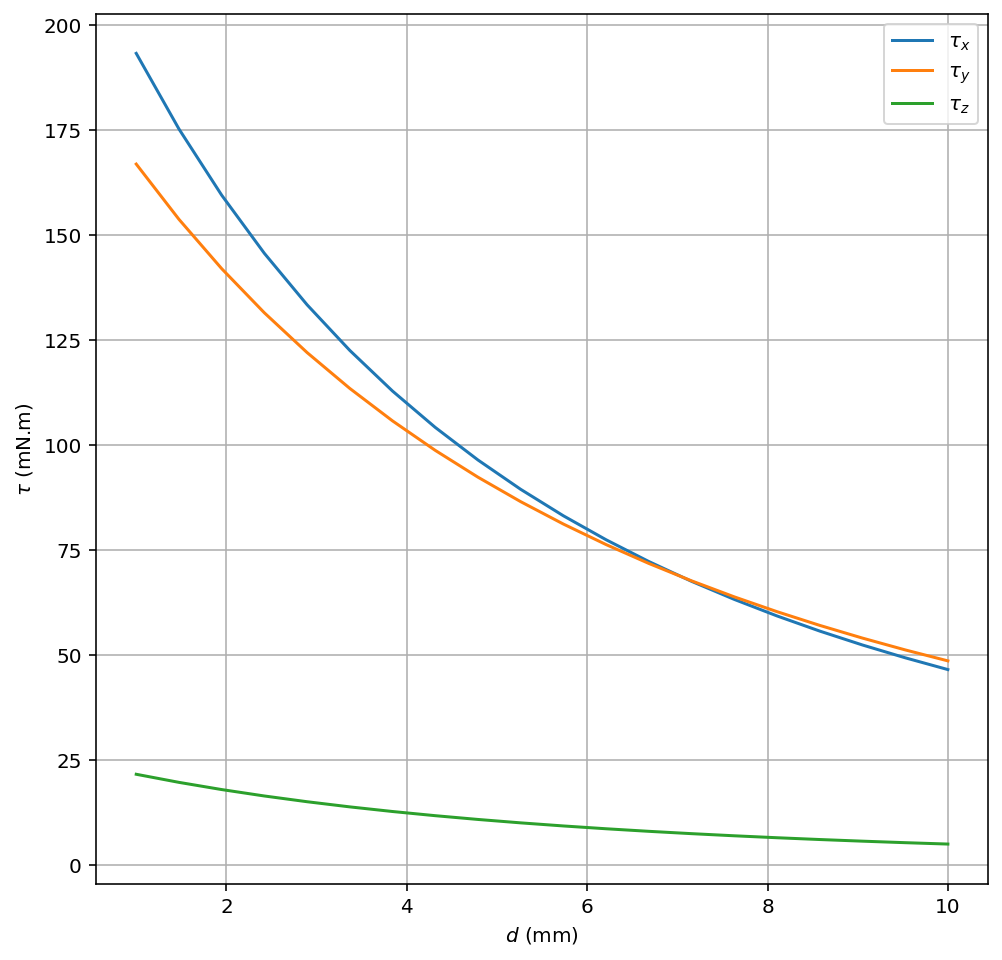

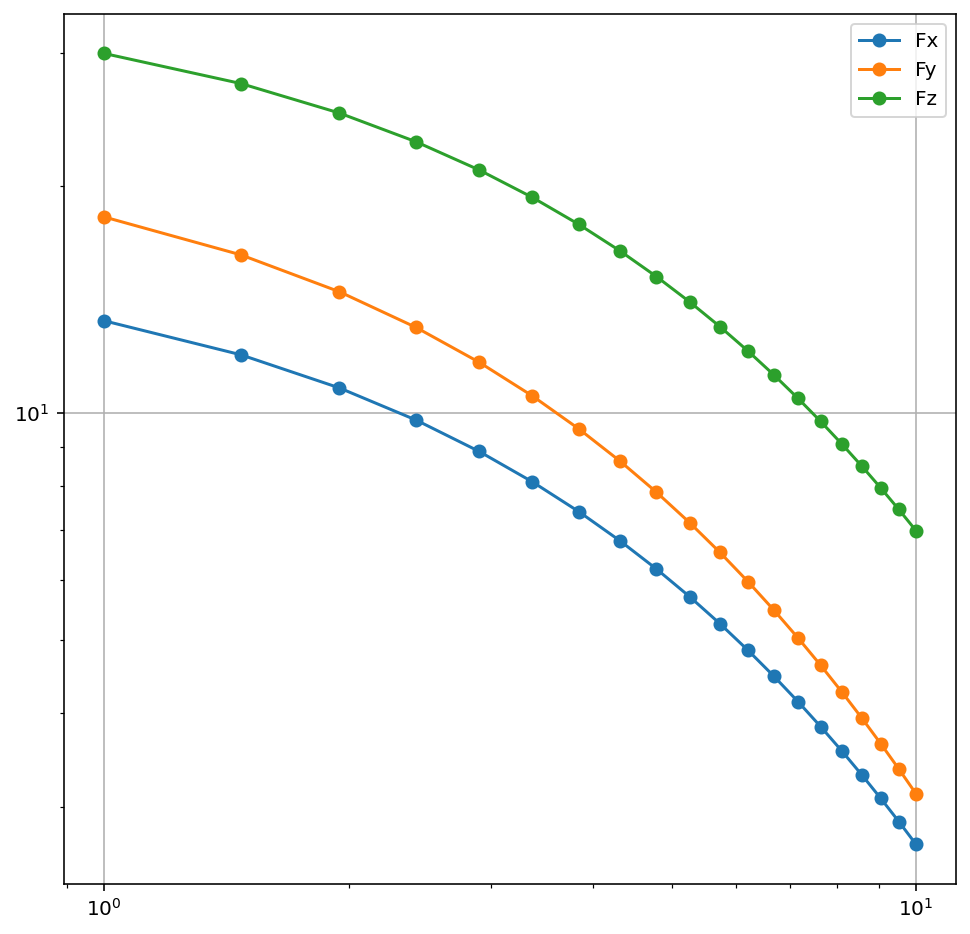

In [39]:
plot_force_result(offsets,f_total, None, None, plot_type='force')
plot_force_result(offsets,t_total*1e3, None, None, plot_type='torque')

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(offsets, np.fabs(f_total[:,0]), 'o-' , label='Fx')
plt.plot(offsets, np.fabs(f_total[:,1]), 'o-' , label='Fy')

plt.plot(offsets, np.fabs(f_total[:,2]), 'o-' , label='Fz')
ax.set_xscale('log')
ax.set_yscale('log')

plt.grid(True)
plt.legend()
plt.show()

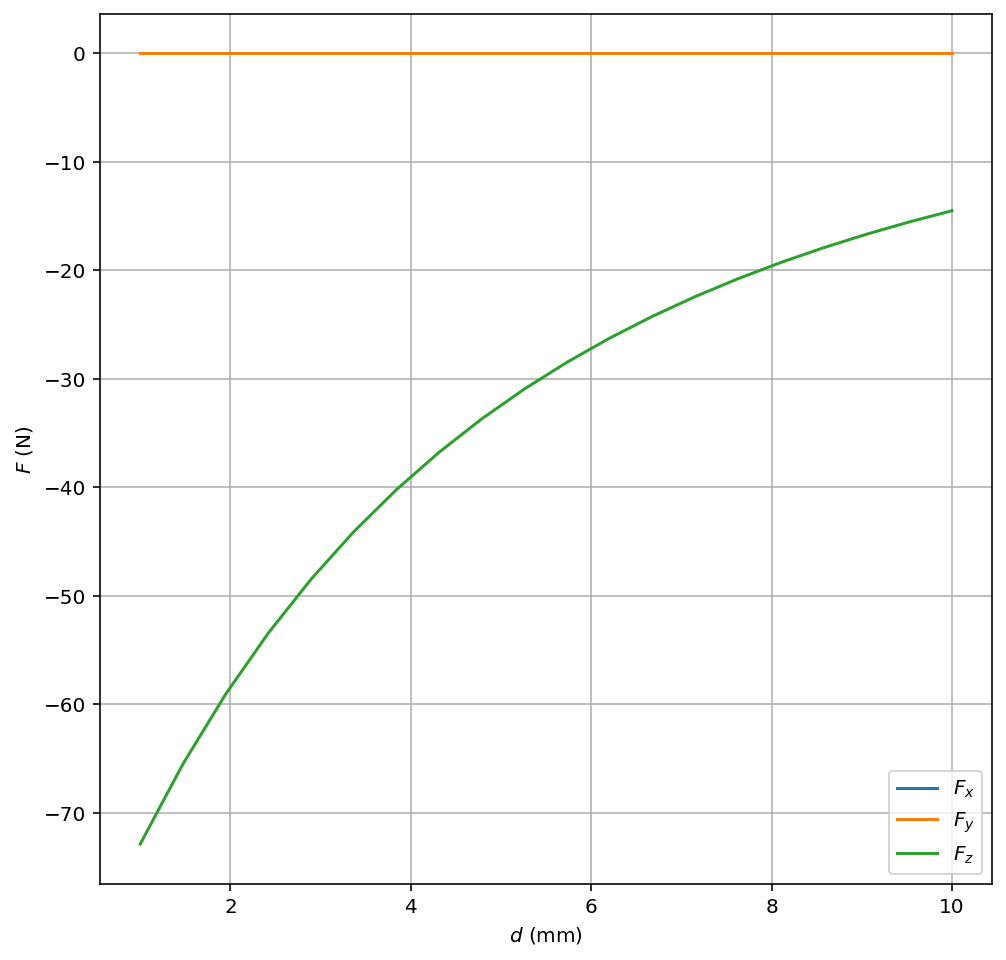

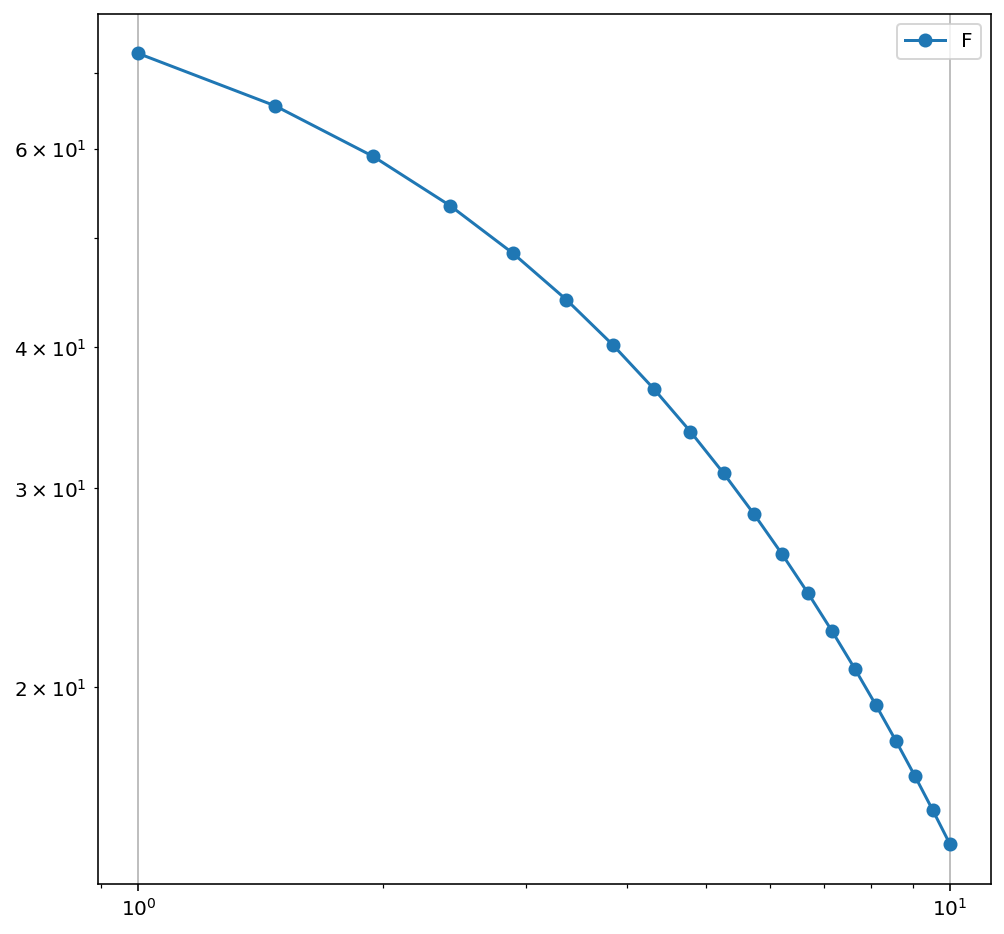

In [21]:
plot_force_result(offsets,f_total, None, None, plot_type='force')
# plot_force_result(offsets,t_total*1e3, None, None, plot_type='torque')

fig, ax = plt.subplots(figsize=(8,8))

plt.plot(offsets, np.fabs(f_total[:,2]), 'o-' , label='F')
ax.set_xscale('log')
ax.set_yscale('log')

plt.grid(True)
plt.legend()
plt.show()

### Check Error Limits

To get the minimum number of points on the surface (=num_points<sup>3</sup> )

In [21]:
m1, m2 = gen_sphere_magnets(offset = 1)

num_points = np.arange(10,1100, 10, dtype=np.intc)

f_total = np.zeros((len(num_points),3))
t_total = np.zeros((len(num_points),3))

unit='mm'

for i in range(len(num_points)):
    f_total[i], t_total[i] = m2.(num_points = num_points[i], unit=unit)

    
f_norm_01 = np.linalg.norm(f_total, axis=1)

In [22]:
m1, m2 = gen_sphere_magnets(offset = 10)
active_magnet = m2

num_points = np.arange(10,1100, 10, dtype=np.intc)

f_total = np.zeros((len(num_points),3))
t_total = np.zeros((len(num_points),3))

unit='mm'

for i in range(len(num_points)):
    f_total[i], t_total[i] = pm.forces.calc_force_sphere(active_magnet, num_points = num_points[i], unit=unit)

f_norm_10 = np.linalg.norm(f_total, axis=1)

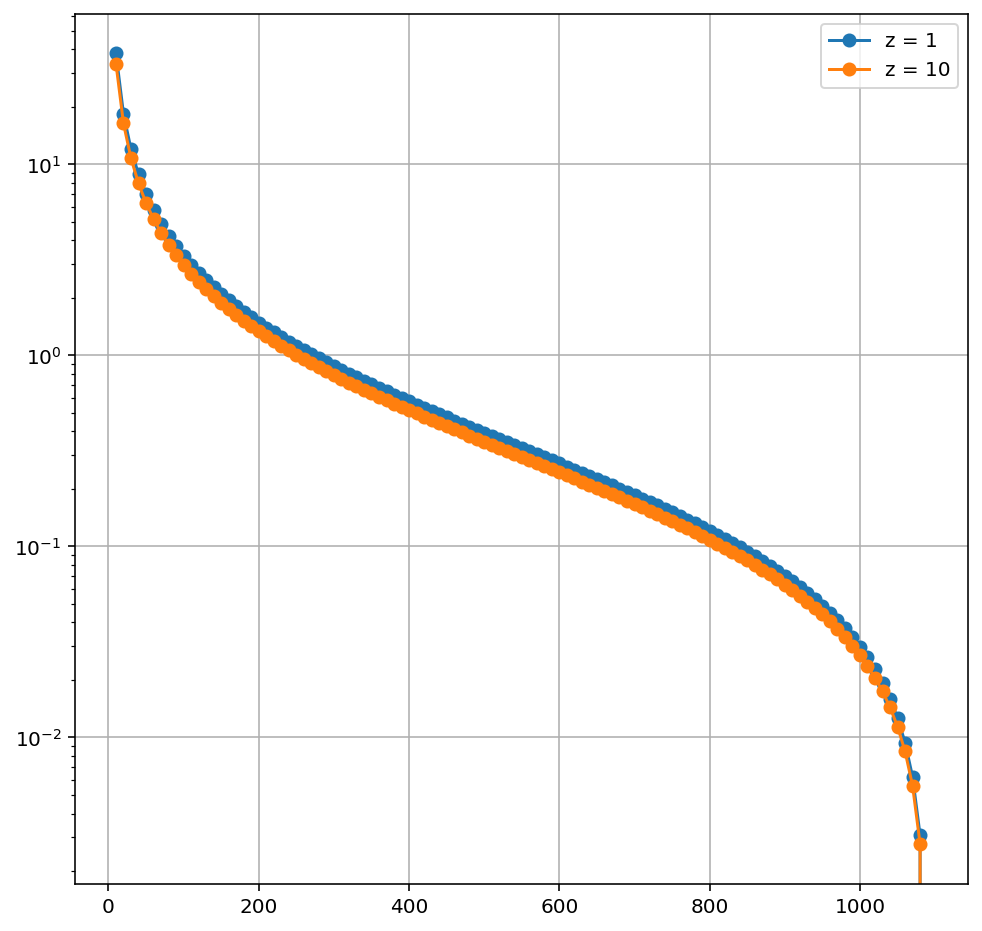

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(num_points, np.fabs((f_norm_01 - f_norm_01[-1])*100/f_norm_01[-1]), 'o-' , label='z = 1')

plt.plot(num_points, np.fabs((f_norm_10 - f_norm_10[-1])*100/f_norm_10[-1]), 'o-' , label='z = 10')
ax.set_yscale('log')
plt.grid(True)
plt.legend()
plt.show()